<a href="https://colab.research.google.com/github/ThanhQuynh0202/VoNgocThanhQuynh_20104053_BTVN/blob/main/Nhan_dien_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Nhận diện Tiền
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
%cd "/content/drive/My Drive/Colab Notebooks/BTVN/Tien"

/content/drive/My Drive/Colab Notebooks/BTVN/Tien


In [14]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [15]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Tien/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 977 images belonging to 11 classes.


In [16]:
validation=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Tien/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 353 images belonging to 11 classes.


In [17]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [18]:
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
31/31 [==============================] - 720s 23s/step - loss: 3.4388 - accuracy: 0.0921 - val_loss: 2.3953 - val_accuracy: 0.1076
Epoch 2/50
31/31 [==============================] - 22s 709ms/step - loss: 2.3457 - accuracy: 0.1453 - val_loss: 2.1662 - val_accuracy: 0.2125
Epoch 3/50
31/31 [==============================] - 22s 707ms/step - loss: 2.2913 - accuracy: 0.1494 - val_loss: 2.2602 - val_accuracy: 0.2096
Epoch 4/50
31/31 [==============================] - 22s 703ms/step - loss: 2.2422 - accuracy: 0.1617 - val_loss: 2.2342 - val_accuracy: 0.1756
Epoch 5/50
31/31 [==============================] - 22s 707ms/step - loss: 2.2335 - accuracy: 0.1720 - val_loss: 2.1472 - val_accuracy: 0.2720
Epoch 6/50
31/31 [==============================] - 22s 704ms/step - loss: 2.0478 - accuracy: 0.2129 - val_loss: 1.9248 - val_accuracy: 0.3683
Epoch 7/50
31/31 [==============================] - 22s 705ms/step - loss: 1.8325 - accuracy: 0.3040 - val_loss: 1.6605 - val_accuracy: 0.4136


In [22]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.10706347227096558
Train Accuracy 0.9703173041343689


<function matplotlib.pyplot.show(*args, **kw)>

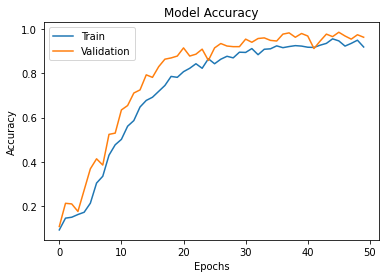

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [24]:
model.save("Tien.h5")

In [26]:
model_CNN=load_model('Tien.h5')

1/1 [==============================] - 0s 111ms/step
500K


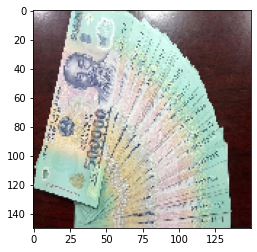

1/1 [==============================] - 0s 20ms/step
20K


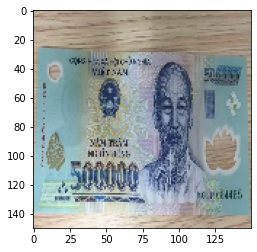

1/1 [==============================] - 0s 23ms/step
500d


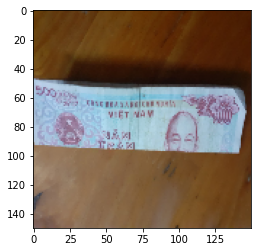

1/1 [==============================] - 0s 18ms/step
500d


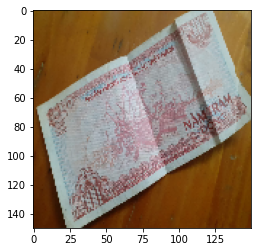

1/1 [==============================] - 0s 15ms/step
200K


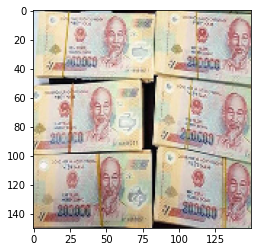

1/1 [==============================] - 0s 15ms/step
200K


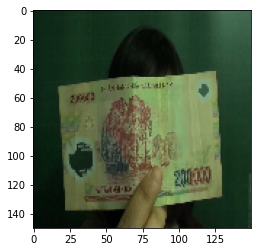

1/1 [==============================] - 0s 16ms/step
200d


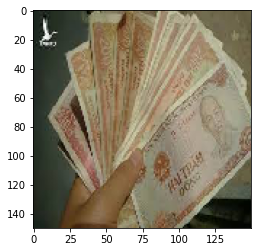

1/1 [==============================] - 0s 16ms/step
200d


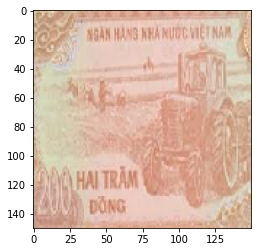

1/1 [==============================] - 0s 17ms/step
100K


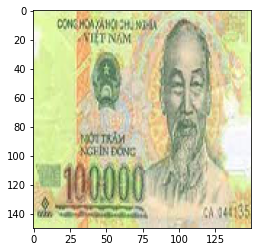

1/1 [==============================] - 0s 17ms/step
100K


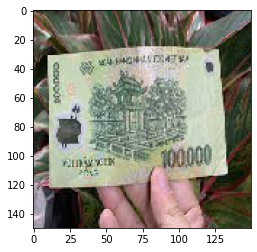

1/1 [==============================] - 0s 17ms/step
5K


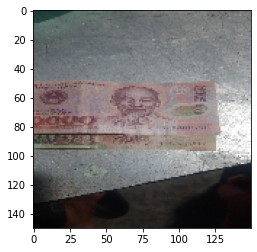

1/1 [==============================] - 0s 19ms/step
20K


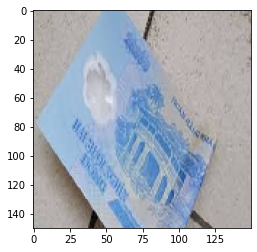

1/1 [==============================] - 0s 19ms/step
10K


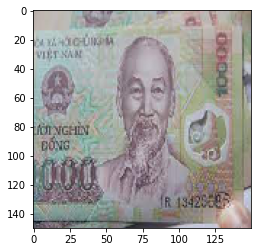

1/1 [==============================] - 0s 15ms/step
10K


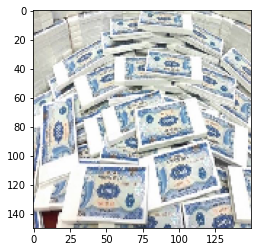

1/1 [==============================] - 0s 16ms/step
2K


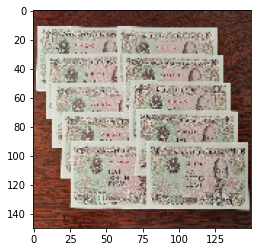

1/1 [==============================] - 0s 16ms/step
1K


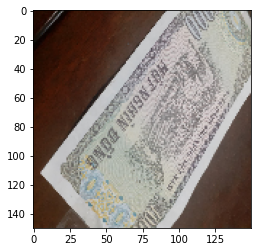

In [27]:
test="/content/drive/My Drive/Colab Notebooks/BTVN/Tien/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='100K'
  if round(result[0][1])==1:
    prediction='10K'
  if round(result[0][2])==1:
    prediction='1K'
  if round(result[0][3])==1:
    prediction='200K'
  if round(result[0][4])==1:
    prediction='200d'
  if round(result[0][5])==1:
    prediction='20K'
  if round(result[0][6])==1:
    prediction='2K'
  if round(result[0][7])==1:
    prediction='500K'
  if round(result[0][8])==1:
    prediction='500d'
  if round(result[0][9])==1:
    prediction='5K'
  print(prediction)
  plt.show()